In [93]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/car-details-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/jc425/.cache/kagglehub/datasets/akshaydattatraykhare/car-details-dataset/versions/1


# Data Import


In [94]:
import pandas as pd
import os
import numpy as np

data_path = os.path.join(path, "CAR DETAILS FROM CAR DEKHO.csv")
print("Data file path:", data_path)

df = pd.read_csv(data_path)

df.head()

Data file path: /Users/jc425/.cache/kagglehub/datasets/akshaydattatraykhare/car-details-dataset/versions/1/CAR DETAILS FROM CAR DEKHO.csv


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


This dataset is from Kaggle, provided by Akshay Dattatray Khare, and contains detailed information about various brands and models of cars in the Indian market.

| Field Name       | Description                                  |
|------------------|----------------------------------------------|
| name             | Name of the car                              |
| year             | Year of the car when it was bought           |
| selling_price    | Selling price of the car                     |
| km_driven        | Kilometers driven by the car                 |
| fuel             | Required fuel for the car                    |
| seller_type      | Seller type of the car                       |
| transmission     | Transmission of the car                      |
| owner            | Number of previous owners of the vehicle     |




# EDA

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [62]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### Missing Values Check

In [63]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### Repalce ['name'] with ['brand']

In [95]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [96]:
df['brand'] = df['name'].str.split().str[0]
print("Brand extracted from name:")
print(df['brand'].unique())

Brand extracted from name:
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


In [97]:
df['brand'] = df['brand'].replace('Land', 'Land Rover')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
 8   brand          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


## Handle duplicates

In [99]:
print(df.duplicated().sum())

df_sorted = df.sort_values(by=list(df.columns))

print(df_sorted[df_sorted.duplicated(keep=False)])

763
                                           name  year  selling_price  \
3912             Ambassador CLASSIC 1500 DSL AC  2005         120000   
4016             Ambassador CLASSIC 1500 DSL AC  2005         120000   
99         Audi A4 2.0 TDI 177 Bhp Premium Plus  2013        1150000   
2578       Audi A4 2.0 TDI 177 Bhp Premium Plus  2013        1150000   
554                     Audi A4 3.0 TDI Quattro  2013        1580000   
...                                         ...   ...            ...   
2936  Volkswagen Vento 1.5 TDI Highline Plus AT  2017         890000   
1628        Volkswagen Vento Diesel Comfortline  2012         215000   
3052        Volkswagen Vento Diesel Comfortline  2012         215000   
478            Volkswagen Vento Diesel Highline  2011         300000   
485            Volkswagen Vento Diesel Highline  2011         300000   

      km_driven    fuel seller_type transmission         owner       brand  
3912      50000  Diesel  Individual       Manual  Seco

In [100]:
df.drop_duplicates(keep='first', inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
 8   brand          3577 non-null   object
dtypes: int64(3), object(6)
memory usage: 279.5+ KB


## Selling Price Distribution

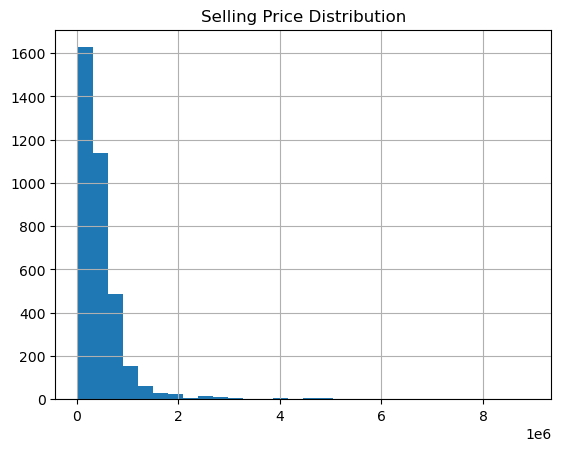

In [102]:
import matplotlib.pyplot as plt
df['selling_price'].hist(bins=30)
plt.title("Selling Price Distribution")
plt.show()

## Categorical Variables Distribution

Count plot for fuel
Count plot for seller_type


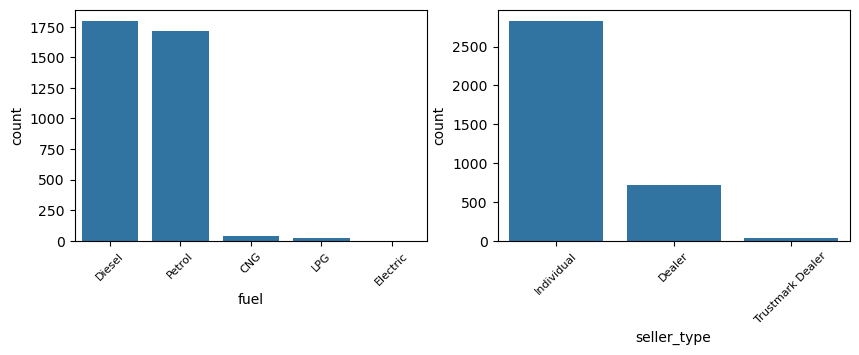

Count plot for transmission
Count plot for owner


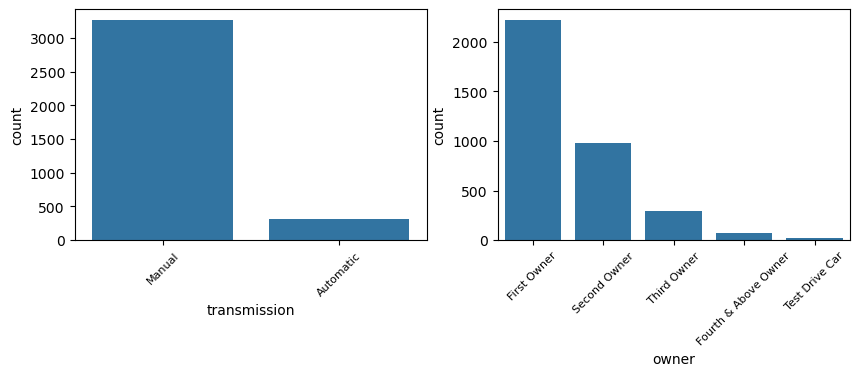

Count plot for brand


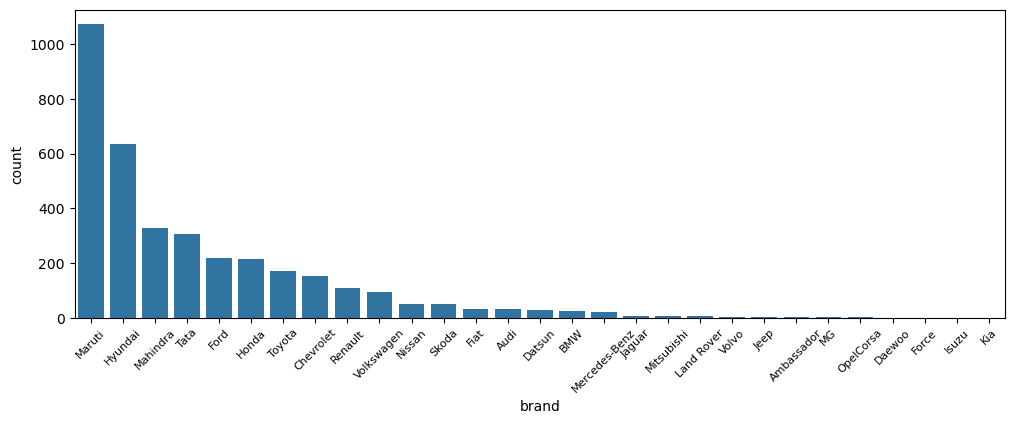

In [103]:
import seaborn as sns

cat_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']
i = 0
while i < len(cat_cols):
    if i == len(cat_cols) - 1:
        fig = plt.figure(figsize=[12, 4])
        plt.subplot(1, 1, 1)
        sns.countplot(x=cat_cols[i], data=df, order=df[cat_cols[i]].value_counts().index)
        print(f"Count plot for {cat_cols[i]}")
        plt.xticks(rotation=45, fontsize=8)
        plt.show()
        i += 1
    else:
        fig = plt.figure(figsize=[10, 3])
        plt.subplot(1, 2, 1)
        sns.countplot(x=cat_cols[i], data=df, order=df[cat_cols[i]].value_counts().index)
        print(f"Count plot for {cat_cols[i]}")
        plt.xticks(rotation=45, fontsize=8)
        i += 1
        plt.subplot(1, 2, 2)
        sns.countplot(x=cat_cols[i], data=df, order=df[cat_cols[i]].value_counts().index)
        print(f"Count plot for {cat_cols[i]}")
        plt.xticks(rotation=45, fontsize=8)
        i += 1
        plt.show()

In [105]:
df['transmission_num'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})

In [106]:
owner_order = {'Test Drive Car': 0,'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}
df['owner_num'] = df['owner'].map(owner_order)

In [107]:
df['owner_num'].value_counts()

owner_num
1    2218
2     978
3     289
4      75
0      17
Name: count, dtype: int64

In [108]:
df.drop(columns=['name', 'transmission', 'owner'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              3577 non-null   int64 
 1   selling_price     3577 non-null   int64 
 2   km_driven         3577 non-null   int64 
 3   fuel              3577 non-null   object
 4   seller_type       3577 non-null   object
 5   brand             3577 non-null   object
 6   transmission_num  3577 non-null   int64 
 7   owner_num         3577 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 251.5+ KB


## Distribution of Selling Price by Categorical Variables

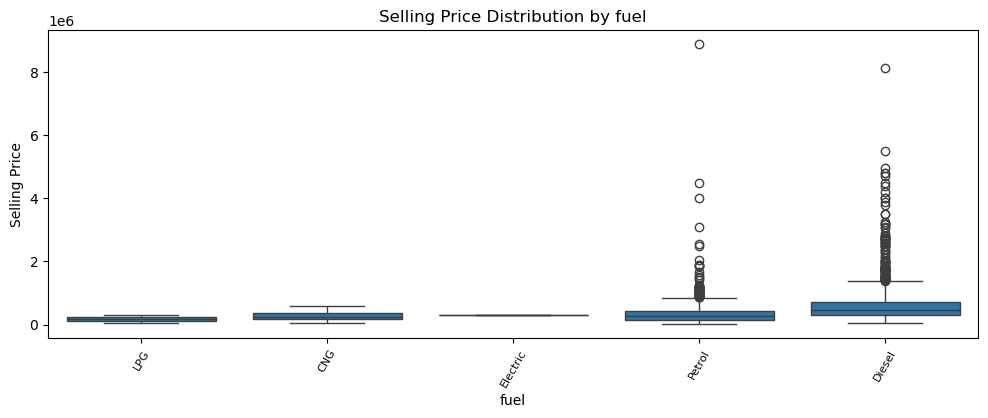

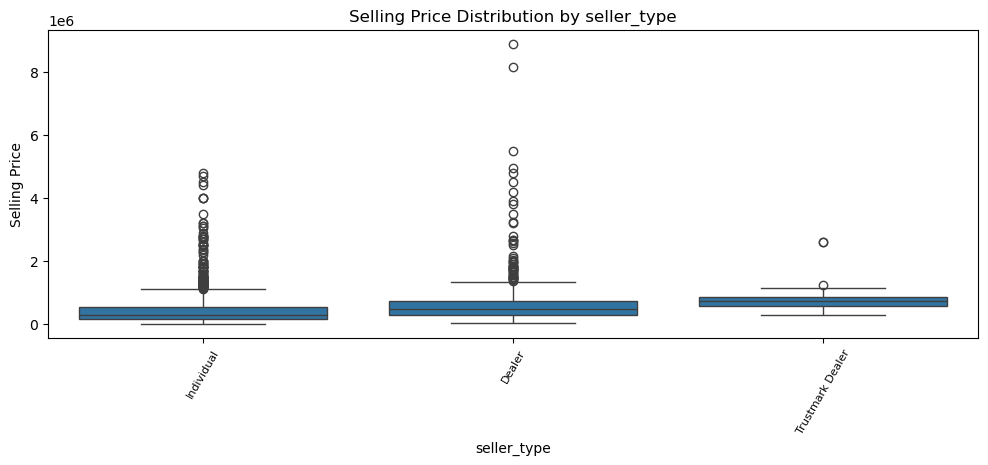

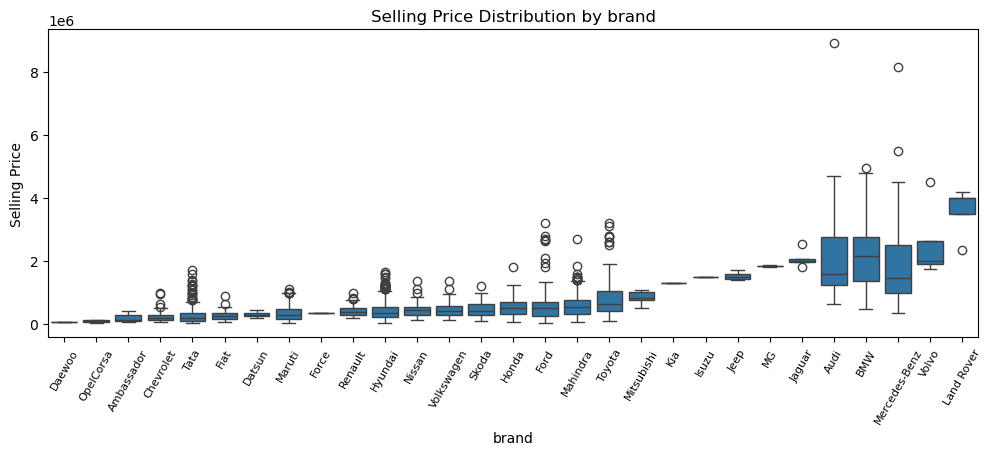

In [109]:
cat_cols = ['fuel', 'seller_type', 'brand']

for col in cat_cols:
    plt.figure(figsize=[12, 4])
    category_order = df.groupby(col)['selling_price'].mean().sort_values().index
    sns.boxplot(x=col, y='selling_price', data=df, order=category_order)
    plt.title(f"Selling Price Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel("Selling Price")
    plt.xticks(rotation=60, fontsize=8)
    plt.show()

## Numerical Variables Distribution

Numerical Attribution (excluding selling price):


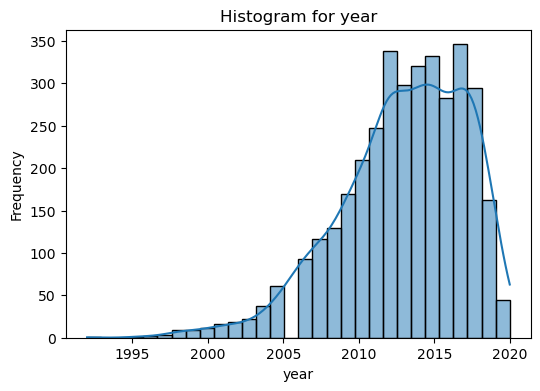

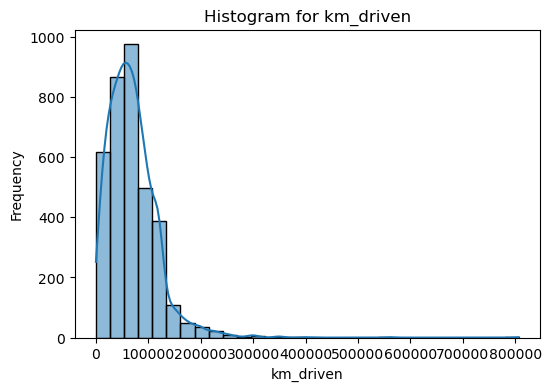

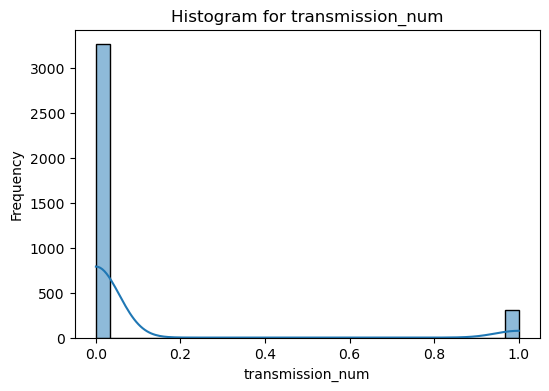

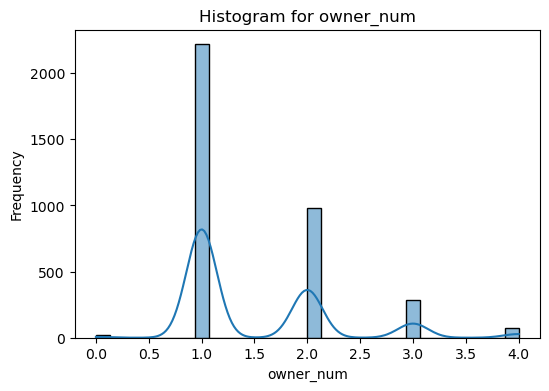

In [110]:
import seaborn as sns

num_cols = df.select_dtypes(include='number').columns
feature_cols = [col for col in num_cols if col != 'selling_price']

print("Numerical Attribution (excluding selling price):")
for col in feature_cols:
    plt.figure(figsize=[6, 4])
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Correlation of Numerical Features with Selling Price

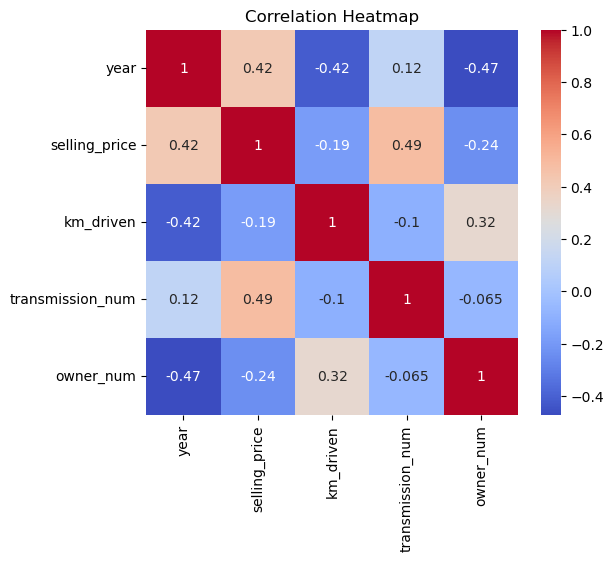

In [111]:
num_df = df.select_dtypes(include='number')  
plt.figure(figsize=[6, 5])
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Correlation with selling price:
selling_price       1.000000
transmission_num    0.486269
year                0.424260
km_driven          -0.187359
owner_num          -0.239919
Name: selling_price, dtype: float64


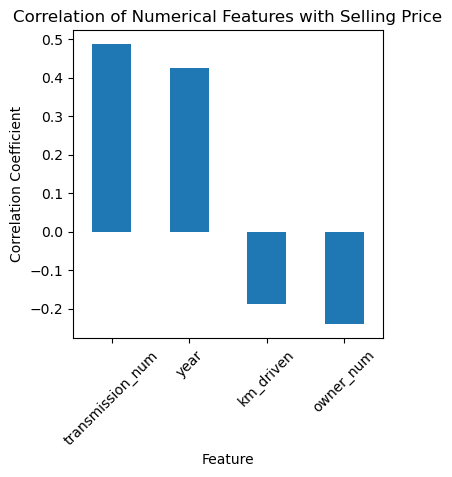

In [113]:
num_df = df.select_dtypes(include='number')
corr_with_price = num_df.corr()['selling_price'].sort_values(ascending=False)

print("Correlation with selling price:")
print(corr_with_price)

plt.figure(figsize=[4, 4])
corr_with_price.drop('selling_price').plot(kind='bar')
plt.title("Correlation of Numerical Features with Selling Price")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Feature")
plt.xticks(rotation=45, fontsize=10)
plt.show()

- transmission_num (numeric encoding of transmission type) has a correlation of 0.53 with selling price, indicating a strong positive relationship. 
    - Automatic transmission (usually encoded as 1) tends to be more expensive.
- year (vehicle year) has a correlation of 0.41 with selling price, meaning newer cars are generally sold at higher prices.
- km_driven (mileage) has a correlation of -0.19 with selling price, showing a weak negative relationship: the more a car has been driven, the lower its price.
- owner_num (number of owners) has a correlation of -0.22 with selling price, indicating that cars with more previous owners tend to have lower prices, but the effect is moderate.

**Conclusion:**  
- Automatic transmission and newer car year have the strongest positive impact on selling price
- Higher mileage and more owners decrease the price, but their influence is weaker.
        

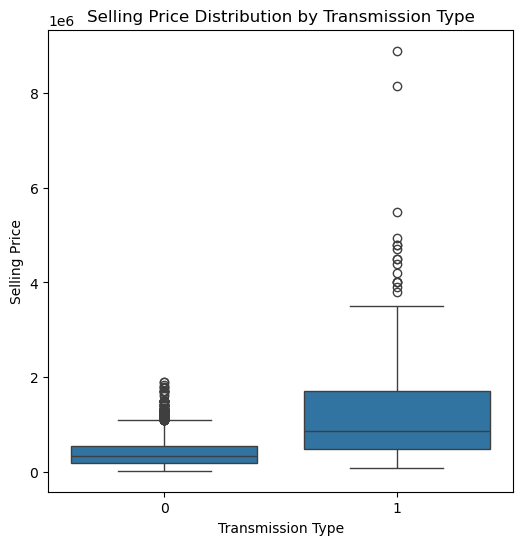

In [114]:
# 0 means Manual, 1 means Automatic

plt.figure(figsize=[6, 6])
sns.boxplot(x='transmission_num', y='selling_price', data=df)
plt.title("Selling Price Distribution by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Selling Price")
plt.show()

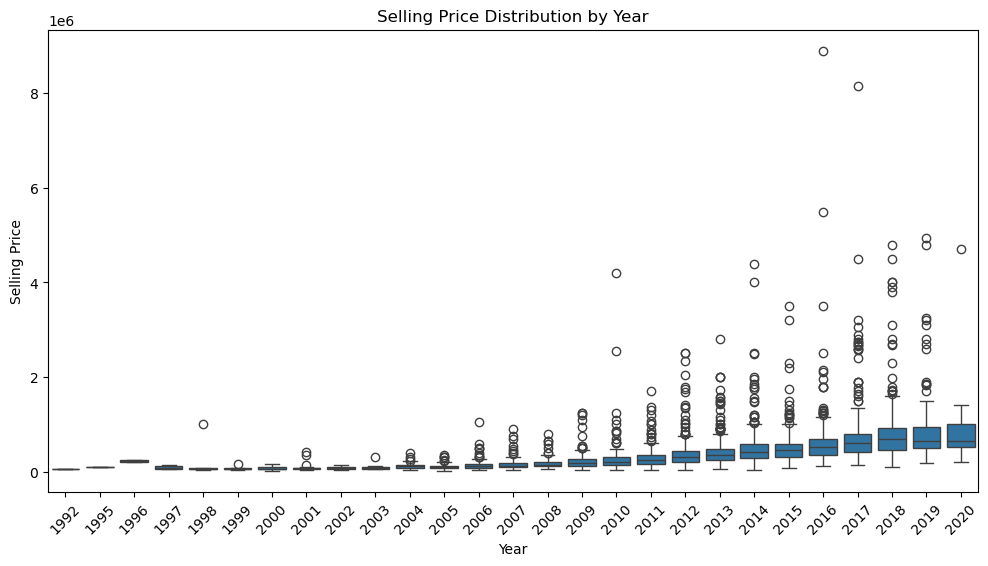

In [115]:
plt.figure(figsize=[12, 6])
sns.boxplot(x='year', y='selling_price', data=df)
plt.title("Selling Price Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.xticks(rotation=45)
plt.show()

## Scatter Plots

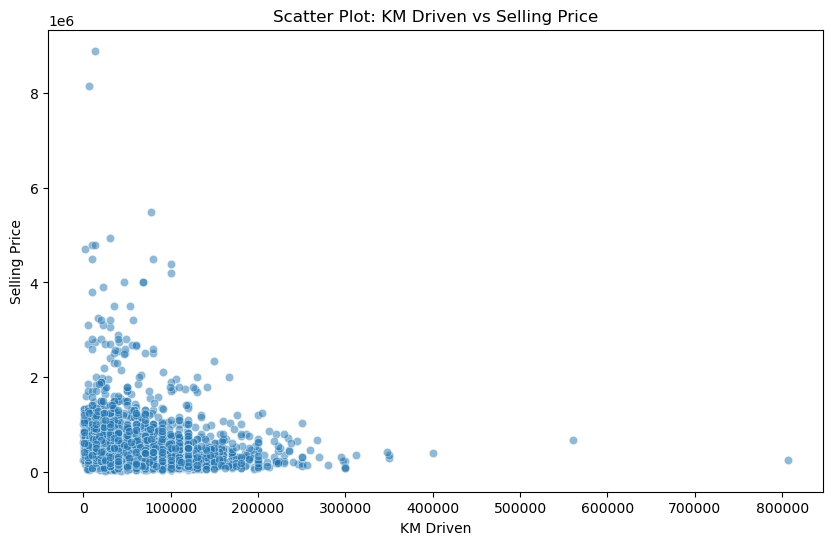

In [116]:
# Scatter plot: Check relationship between km_driven and selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=df, alpha=0.5)
plt.title('Scatter Plot: KM Driven vs Selling Price')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()

**Conclusion:**
- **Negative Correlation:** There is a clear negative trend; as mileage (`km_driven`) increases, the `selling_price` tends to decrease.
- **Non-linearity:** The relationship appears to be non-linear (possibly exponential decay), suggesting that a linear model might not fit well without transformation (like log transformation).

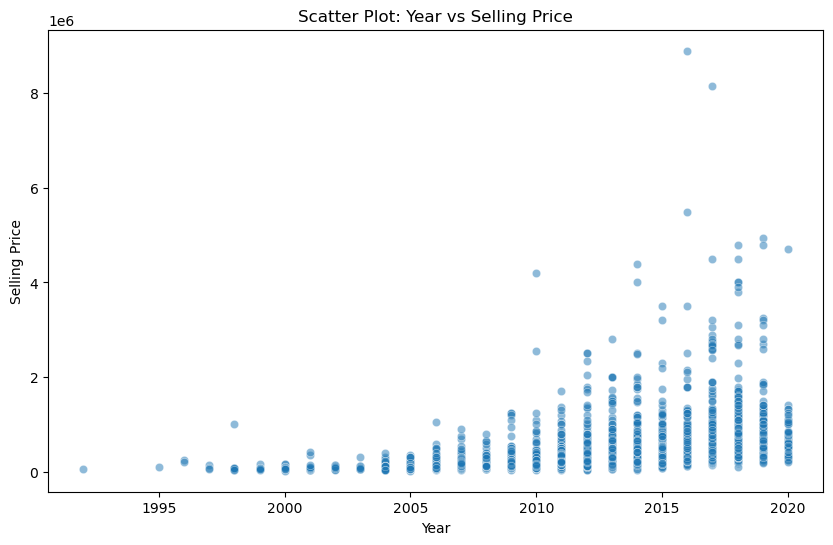

In [83]:
# Scatter plot: Check relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.5)
plt.title('Scatter Plot: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

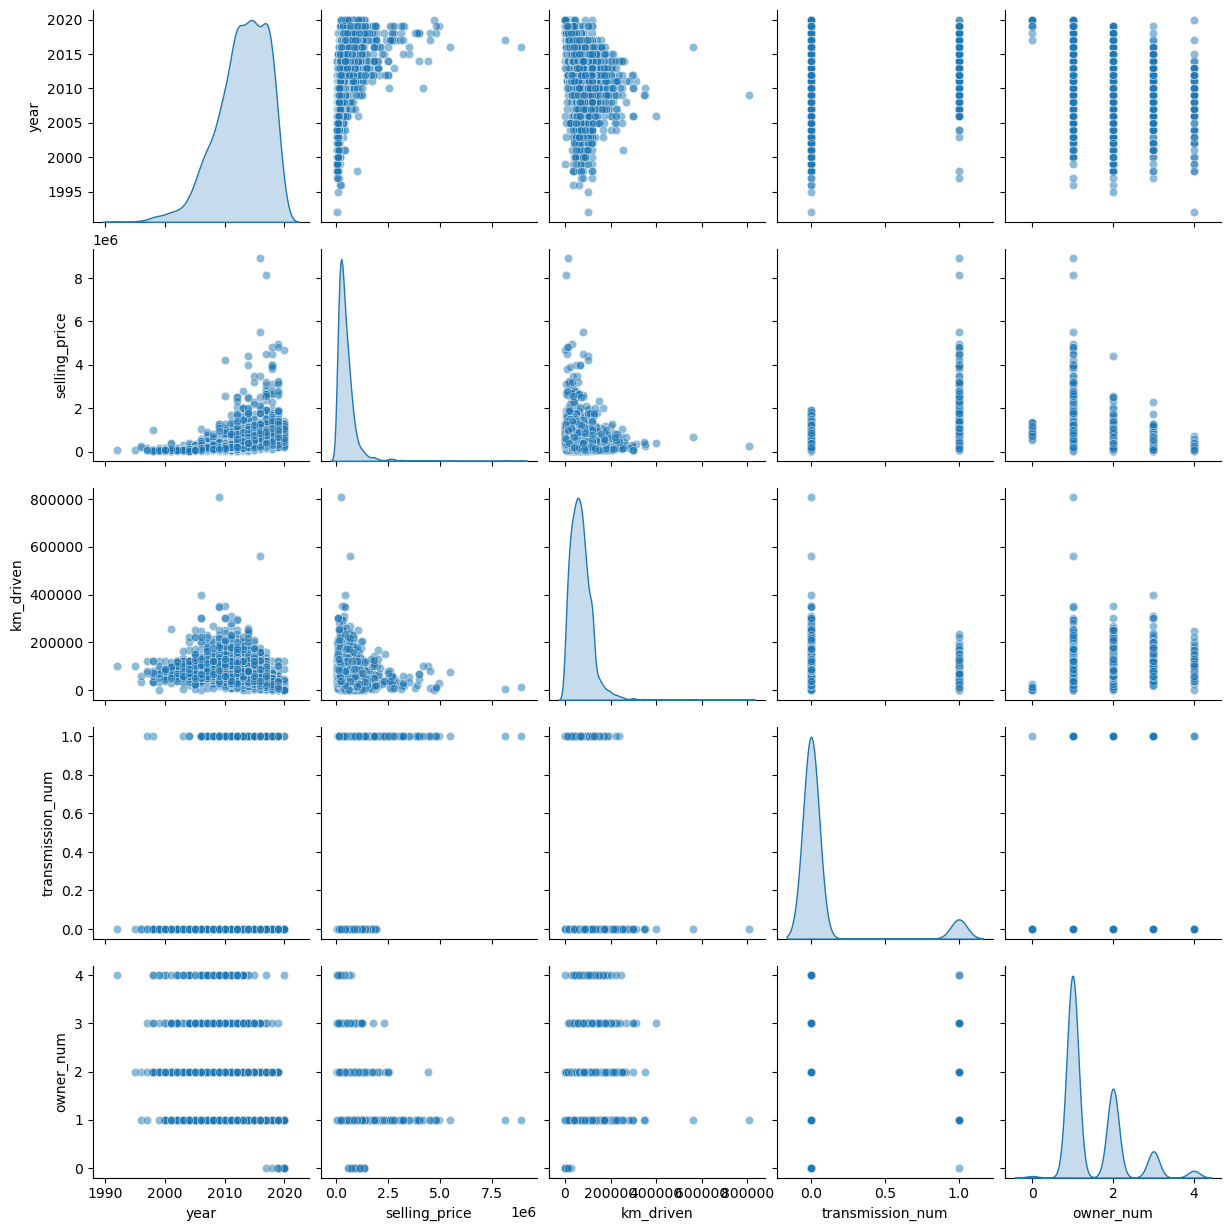

In [84]:
# Pairplot to see all relationships at once
numerical_cols = ['year', 'selling_price', 'km_driven', 'transmission_num', 'owner_num']
sns.pairplot(df[numerical_cols], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

## Handle selling_price Outliers

Shape before outlier removal: (3577, 8)


/var/folders/jg/3s3hl_2j59g8wwv83lbrx5th0000gn/T/ipykernel_30442/267644293.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('brand', group_keys=False).apply(filter_brand_outliers)


Shape after outlier removal: (3471, 8)


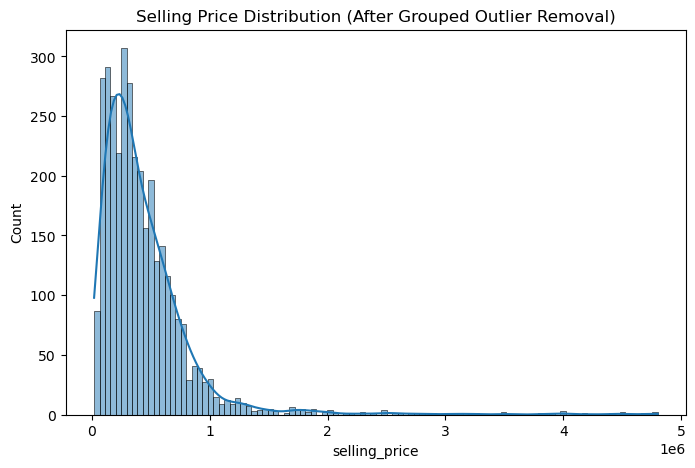

In [117]:
# Outlier Handling: Grouped by Brand (Improved)
# Global IQR removal deletes luxury brands (like Land Rover) because they are expensive compared to average.
# We should remove outliers WITHIN each brand to preserve high-end brands.

print(f"Shape before outlier removal: {df.shape}")
brand_counts_before = df['brand'].value_counts()

# Function to filter outliers per group
def filter_brand_outliers(group):
    # If a brand has very few samples (e.g. < 5), we keep them all to avoid losing rare luxury cars
    if len(group) < 5: 
        return group
    
    Q1 = group['selling_price'].quantile(0.25)
    Q3 = group['selling_price'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds specific to this brand
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Return only valid rows
    return group[(group['selling_price'] >= lower) & (group['selling_price'] <= upper)]

# Apply grouping and filtering
# group_keys=False prevents pandas from adding an extra index level
df = df.groupby('brand', group_keys=False).apply(filter_brand_outliers)

print(f"Shape after outlier removal: {df.shape}")

# Visualization
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], kde=True)
plt.title('Selling Price Distribution (After Grouped Outlier Removal)')
plt.show()

**Conclusion:**
- **Brand-Specific Outlier Removal:** We switched to removing outliers *within* each brand. This ensures that luxury cars (like Land Rover) are not mistakenly removed just because they are expensive, while still filtering out anomalous prices (e.g., an overpriced budget car).

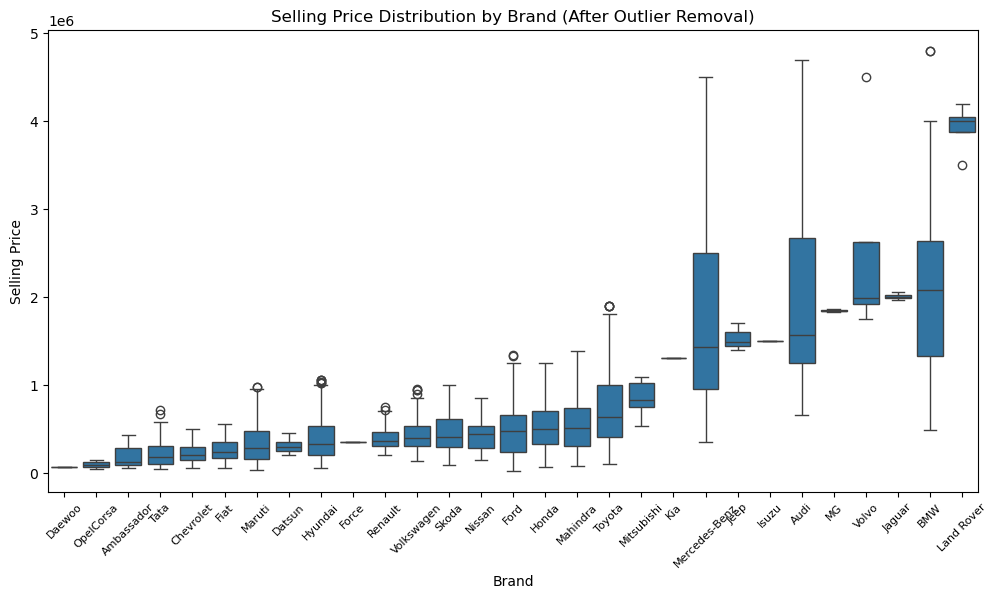

Outlier Removal Summary (Top 10 brands by removed count):
           Before  After  Removed
brand                            
Hyundai       637    613       24
Tata          308    287       21
Mahindra      328    316       12
Ford          220    211        9
Maruti       1072   1064        8
Toyota        170    162        8
Chevrolet     151    147        4
Renault       110    106        4
Nissan         52     49        3
Jaguar          5      3        2

Total outliers removed: 106


In [118]:
# Check Brand vs Selling Price after outlier removal
# This helps to see if we accidentally removed luxury brands
plt.figure(figsize=(12, 6))
# Sort brands by median price for better visualization
brand_order = df.groupby('brand')['selling_price'].median().sort_values(ascending=True).index
sns.boxplot(x='brand', y='selling_price', data=df, order=brand_order)
plt.title('Selling Price Distribution by Brand (After Outlier Removal)')
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('Brand')
plt.ylabel('Selling Price')
plt.show()

# Check which brands might have been affected most (count check)
print("Outlier Removal Summary (Top 10 brands by removed count):")
brand_counts_after = df['brand'].value_counts()

if 'brand_counts_before' in locals():
    outliers_removed = brand_counts_before.sub(brand_counts_after, fill_value=0)
    summary_df = pd.DataFrame({
        'Before': brand_counts_before,
        'After': brand_counts_after,
        'Removed': outliers_removed
    }).fillna(0).astype(int).sort_values('Removed', ascending=False)
    
    print(summary_df[summary_df['Removed'] > 0].head(10))
    print(f"\nTotal outliers removed: {outliers_removed.sum()}")
else:
    print("Brand counts after outlier removal:")
    print(df['brand'].value_counts().head(10))

## Check Log Transformation effect

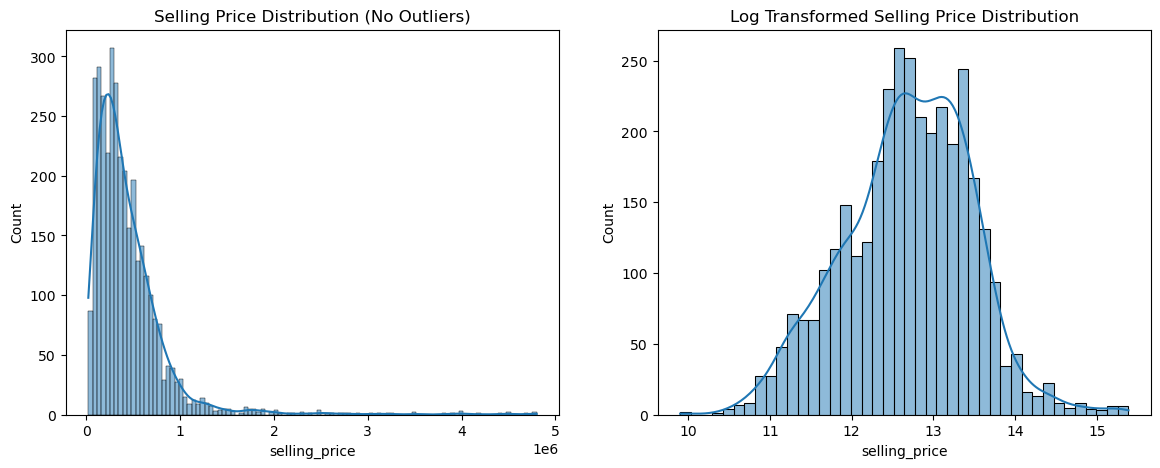

Skewness before log transform: 4.41
Skewness after log transform: -0.12


In [119]:
# Check Log Transformation effect
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution after outlier removal
sns.histplot(df['selling_price'], kde=True, ax=axes[0])
axes[0].set_title('Selling Price Distribution (No Outliers)')

# Log Transformed Distribution
sns.histplot(np.log1p(df['selling_price']), kde=True, ax=axes[1])
axes[1].set_title('Log Transformed Selling Price Distribution')

plt.show()

# Calculate skewness to quantify the improvement
print(f"Skewness before log transform: {df['selling_price'].skew():.2f}")
print(f"Skewness after log transform: {np.log1p(df['selling_price']).skew():.2f}")

**Conclusion:**
- **Skewness:** The original `selling_price` distribution is right-skewed, which can bias linear models.
- **Normalization:** The log transformation (`np.log1p`) effectively normalizes the data, converting the distribution into a near-Gaussian (bell) shape.
- **Decision:** We will apply this transformation to the target variable `y` during the model training phase to improve performance.

# Get Dummies

In [120]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'brand'], drop_first=True)

In [121]:
df.head()

,year,selling_price,km_driven,transmission_num,owner_num,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
2878,2002,50000,120000,0,4,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3465,2012,430000,50000,0,2,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3912,2005,120000,50000,0,2,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
32,2011,1190000,175900,1,1,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35,2013,1735000,50000,1,1,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [122]:
df.isnull().sum()

year                            0
selling_price                   0
km_driven                       0
transmission_num                0
owner_num                       0
fuel_Diesel                     0
fuel_Electric                   0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
brand_Audi                      0
brand_BMW                       0
brand_Chevrolet                 0
brand_Daewoo                    0
brand_Datsun                    0
brand_Fiat                      0
brand_Force                     0
brand_Ford                      0
brand_Honda                     0
brand_Hyundai                   0
brand_Isuzu                     0
brand_Jaguar                    0
brand_Jeep                      0
brand_Kia                       0
brand_Land Rover                0
brand_MG                        0
brand_Mahindra                  0
brand_Maruti                    0
brand_Mercedes

# Train/Test Split

In [123]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [124]:
feature_cols = [col for col in df.columns if col != 'selling_price']
X = df[feature_cols]

# Apply Log Transformation to the target variable
# This helps to normalize the distribution and improve linear model performance
y = np.log1p(df['selling_price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# Check means and stds before scaling
print('Check means and stds before scaling')
print("Train mean:")
print(X_train.mean())
print("Train std:")
print(X_train.std())

print("Test mean:")
print(X_test.mean())
print("Test std:")
print(X_test.std())

Check means and stds before scaling
Train mean:
year                             2012.878963
km_driven                       69731.371398
transmission_num                    0.079971
owner_num                           1.501441
fuel_Diesel                         0.490634
fuel_Electric                       0.000360
fuel_LPG                            0.006124
fuel_Petrol                         0.491715
seller_type_Individual              0.790346
seller_type_Trustmark Dealer        0.006844
brand_Audi                          0.008285
brand_BMW                           0.006844
brand_Chevrolet                     0.039265
brand_Daewoo                        0.000360
brand_Datsun                        0.009006
brand_Fiat                          0.007205
brand_Force                         0.000360
brand_Ford                          0.057277
brand_Honda                         0.061239
brand_Hyundai                       0.179395
brand_Isuzu                         0.000360
brand_J

# Feature Scaling

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
# Check means and stds after scaling
print('Check means and stds after scaling')
print("Train mean:")
print(X_train_scaled.mean())
print("Train std:")
print(X_train_scaled.std())

print("Test mean:")
print(X_test_scaled.mean())
print("Test std:")
print(X_test_scaled.std())

Check means and stds after scaling
Train mean:
4.522226501791078e-16
Train std:
1.0
Test mean:
0.0004213210685034919
Test std:
0.9411529075152393


# Apply Linear Regression with Polynomial Features

In [128]:
poly = PolynomialFeatures(degree=1, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train the Model

In [129]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [130]:
y_pred = model.predict(X_test_poly)

# Check the scale of the target variable y
# Since we applied Log Transformation but NOT StandardScaler on y:
# The mean should NOT be 0 and std should NOT be 1
# This confirms we are working in the Log-transformed scale (values around 10-15)
print(f'y_test.mean(): {y_test.mean()}')
print(f'y_test.std(): {y_test.std()}')
print(f'y_pred.mean(): {y_pred.mean()}')
print(f'y_pred.std(): {y_pred.std()}')

y_test.mean(): 12.682748271474422
y_test.std(): 0.7715597518860378
y_pred.mean(): 12.655847712618517
y_pred.std(): 0.7127010638695982


$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}i)^2}{\sum{i=1}^{n}(y_i - \bar{y})^2}$$

In [131]:
# Metrics on Log Scale (The model was trained on log prices)
print("Log Scale RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Log Scale R²:", r2_score(y_test, y_pred))

# Metrics on Original Scale (Convert back to Rupees for interpretation)
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred)
print("\nOriginal Scale RMSE:", np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)))
print("Original Scale R²:", r2_score(y_test_orig, y_pred_orig))

Log Scale RMSE: 0.3940686250313996
Log Scale R²: 0.7387658668311823

Original Scale RMSE: 182958.97475274297
Original Scale R²: 0.7631791853566459


# Experiment

In [132]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [133]:
degrees = range(1, 4)

In [140]:
train_rmse_errors = []
test_rmse_errors = []
train_r2_scores = []
test_r2_scores = []

alphas = [0.1, 1, 10]

for d in degrees:
    print(f"Processing degree={d}...")

    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    print(f"  Feature shape: {X_train_poly.shape}")
    
    # RidgeCV with fewer CV folds (3 instead of 5) to speed up. We tried cv=5 before but it took too much time.
    model = RidgeCV(alphas=alphas, fit_intercept=True, cv=5)
    model.fit(X_train_poly, y_train)
    
    # prediction
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    # calculate RMSE
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    
    # calculate R²
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    
    print(f"degree={d} | Best alpha: {model.alpha_:.4f} | Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")



# Following code does not use RidgeCV, kept for reference
# for d in degrees:

#     poly = PolynomialFeatures(degree=d, include_bias=False)
#     X_train_poly = poly.fit_transform(X_train_scaled)
#     X_test_poly = poly.transform(X_test_scaled)
    
#     # model training
#     model = LinearRegression(fit_intercept=True)
#     model.fit(X_train_poly, y_train)
    
#     # prediction
#     train_pred = model.predict(X_train_poly)
#     test_pred = model.predict(X_test_poly)
    
#     # calculate RMSE
#     train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))
#     test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))
#     train_rmse_errors.append(train_RMSE)
#     test_rmse_errors.append(test_RMSE)
    
#     # calculate R²
#     train_r2 = r2_score(y_train, train_pred)
#     test_r2 = r2_score(y_test, test_pred)
#     train_r2_scores.append(train_r2)
#     test_r2_scores.append(test_r2)



Processing degree=1...
  Feature shape: (2776, 38)
degree=1 | Best alpha: 1.0000 | Train R²: 0.7896 | Test R²: 0.7390
Processing degree=2...
  Feature shape: (2776, 779)
degree=2 | Best alpha: 10.0000 | Train R²: 0.8128 | Test R²: 0.7388
Processing degree=3...
  Feature shape: (2776, 10659)
degree=3 | Best alpha: 10.0000 | Train R²: 0.8413 | Test R²: 0.6120


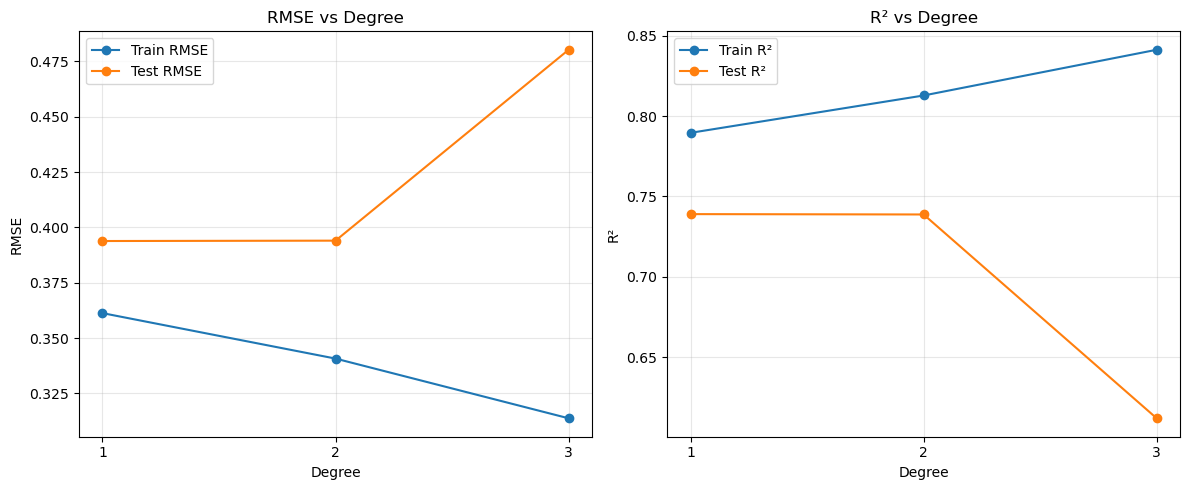

In [141]:
# Plot the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, train_rmse_errors, label='Train RMSE', marker='o')
plt.plot(degrees, test_rmse_errors, label='Test RMSE', marker='o')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Degree')
plt.xticks(degrees)  
plt.grid(True, alpha=0.3) 
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, train_r2_scores, label='Train R²', marker='o')
plt.plot(degrees, test_r2_scores, label='Test R²', marker='o')
plt.xlabel('Degree')
plt.ylabel('R²')
plt.title('R² vs Degree')
plt.xticks(degrees)  
plt.grid(True, alpha=0.3) 
plt.legend()

plt.tight_layout()
plt.show()

In [142]:
for i, d in enumerate(degrees):
    print(f"degree={d} | Train R²: {train_r2_scores[i]:.4f} | Test R²: {test_r2_scores[i]:.4f}")

degree=1 | Train R²: 0.7896 | Test R²: 0.7390
degree=2 | Train R²: 0.8128 | Test R²: 0.7388
degree=3 | Train R²: 0.8413 | Test R²: 0.6120


Processing degree=1...
Ridge | degree=1 | Best alpha: 0.0100 | Train R²: 0.7896 | Test R²: 0.7388
Ridge | degree=1 | Best alpha: 0.0100 | Train R²: 0.7896 | Test R²: 0.7388
Lasso | degree=1 | Best alpha: 0.0100 | Train R²: 0.7851 | Test R²: 0.7414
Processing degree=2...
Lasso | degree=1 | Best alpha: 0.0100 | Train R²: 0.7851 | Test R²: 0.7414
Processing degree=2...
Ridge | degree=2 | Best alpha: 162.3777 | Train R²: 0.8072 | Test R²: 0.7513
Ridge | degree=2 | Best alpha: 162.3777 | Train R²: 0.8072 | Test R²: 0.7513
Lasso | degree=2 | Best alpha: 0.0100 | Train R²: 0.7956 | Test R²: 0.7483
Lasso | degree=2 | Best alpha: 0.0100 | Train R²: 0.7956 | Test R²: 0.7483


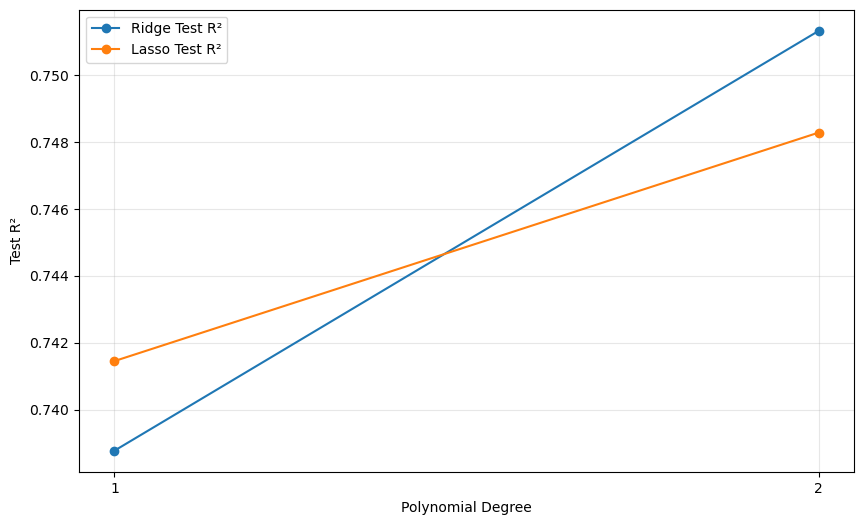

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Removed degree 3 to avoid overfitting
degrees = [1, 2]
ridge_train_r2_scores = []
ridge_test_r2_scores = []
lasso_train_r2_scores = []
lasso_test_r2_scores = []

# Use log-scale alpha range
alphas = np.logspace(-2, 3, 20)

for degree in degrees:
    print(f"Processing degree={degree}...")
    
    # --- Ridge Regression ---
    # Optimization: Use Pipeline (Poly -> Scale -> Ridge) to ensure features are scaled before regularization
    # Optimization: cv=3 to reduce computation
    ridge_pipe = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        StandardScaler(),
        RidgeCV(alphas=alphas, cv=3)
    )
    
    ridge_pipe.fit(X_train, y_train)
    ridge_train_r2 = ridge_pipe.score(X_train, y_train)
    ridge_test_r2 = ridge_pipe.score(X_test, y_test)
    ridge_train_r2_scores.append(ridge_train_r2)
    ridge_test_r2_scores.append(ridge_test_r2)
    
    best_alpha_r = ridge_pipe.named_steps['ridgecv'].alpha_
    print(f"Ridge | degree={degree} | Best alpha: {best_alpha_r:.4f} | Train R²: {ridge_train_r2:.4f} | Test R²: {ridge_test_r2:.4f}")

    # --- Lasso Regression ---
    # Optimization: Lasso is usually slower than Ridge, use n_jobs=-1 for parallel computation
    # Optimization: cv=3
    lasso_pipe = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        StandardScaler(),
        LassoCV(alphas=alphas, cv=3, max_iter=2000, n_jobs=-1, random_state=42)
    )
    
    lasso_pipe.fit(X_train, y_train)
    lasso_train_r2 = lasso_pipe.score(X_train, y_train)
    lasso_test_r2 = lasso_pipe.score(X_test, y_test)
    lasso_train_r2_scores.append(lasso_train_r2)
    lasso_test_r2_scores.append(lasso_test_r2)
    
    best_alpha_l = lasso_pipe.named_steps['lassocv'].alpha_
    print(f"Lasso | degree={degree} | Best alpha: {best_alpha_l:.4f} | Train R²: {lasso_train_r2:.4f} | Test R²: {lasso_test_r2:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(degrees, ridge_test_r2_scores, label='Ridge Test R²', marker='o')
plt.plot(degrees, lasso_test_r2_scores, label='Lasso Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Test R²')
plt.xticks(degrees)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

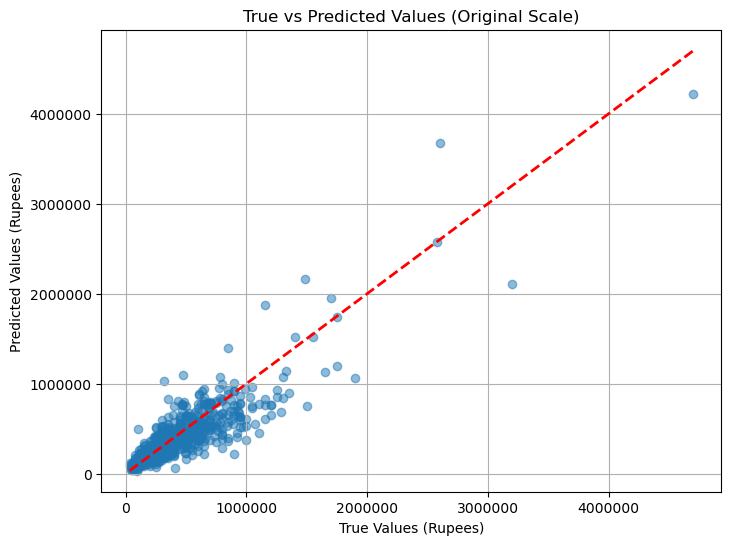

Original Scale RMSE: 183,426.81
Original Scale R²: 0.7620
Best Alpha (Log Scale Model): 162.3777


In [ ]:
# Train the best model (Ridge, degree=2) and plot results
# Based on previous experiment, Ridge with degree=2 performed well

# Re-create the best model pipeline
best_degree = 2
best_model = make_pipeline(
    PolynomialFeatures(degree=best_degree, include_bias=False),
    StandardScaler(),
    RidgeCV(alphas=alphas, cv=3)
)

best_model.fit(X_train, y_train)
y_pred_log = best_model.predict(X_test)

# --- Convert back to Original Units (Rupees) ---
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred_log)

# Plot True vs Predicted values (Original Units)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.5)
# Plot the perfect prediction line
min_val = min(y_test_orig.min(), y_pred_orig.min())
max_val = max(y_test_orig.max(), y_pred_orig.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.xlabel('True Values (Rupees)')
plt.ylabel('Predicted Values (Rupees)')
plt.title(f'True vs Predicted Values (Original Units)')
# Use plain style to avoid scientific notation
plt.ticklabel_format(style='plain', axis='both') 
plt.grid(True)
plt.show()

# Calculate metrics on Original Units
rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
r2_orig = r2_score(y_test_orig, y_pred_orig)

print(f"RMSE (Original Units - Rupees): {rmse_orig:,.2f}")
print(f"R² (Original Units): {r2_orig:.4f}")
print(f"Best Alpha (Log Model Parameter): {best_model.named_steps['ridgecv'].alpha_:.4f}")

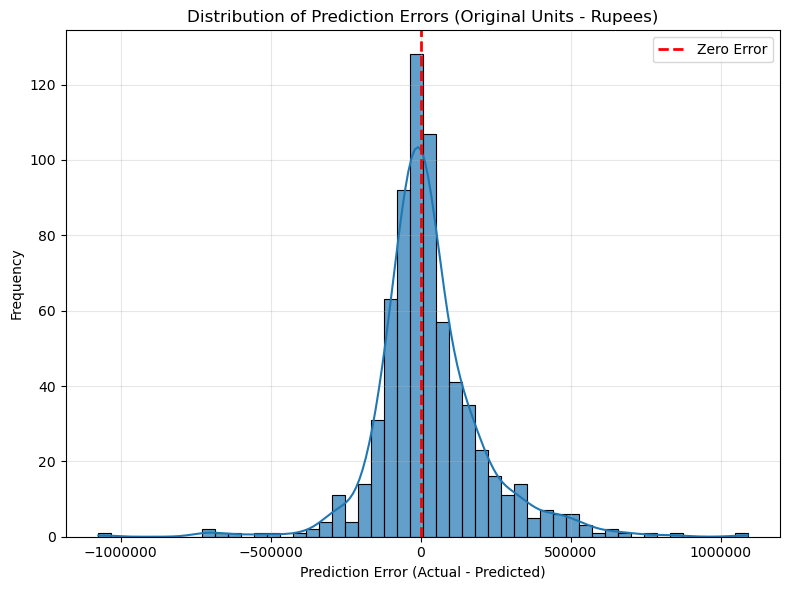

Mean Error: 28,928.35
Standard Deviation of Errors: 181,131.29
Min Error: -1,074,360.89
Max Error: 1,089,775.78


In [150]:
# Calculate prediction errors (residuals) on Original Units
# Ensure y_test_orig and y_pred_orig are defined from the previous cell
errors_orig = y_test_orig - y_pred_orig

# Plot Distribution of Prediction Errors
plt.figure(figsize=(8, 6))
sns.histplot(errors_orig, bins=50, kde=True, alpha=0.7)
plt.title('Distribution of Prediction Errors (Original Units - Rupees)')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
# Format x-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Print error statistics
print(f"Mean Error: {np.mean(errors_orig):,.2f}")
print(f"Standard Deviation of Errors: {np.std(errors_orig):,.2f}")
print(f"Min Error: {np.min(errors_orig):,.2f}")
print(f"Max Error: {np.max(errors_orig):,.2f}")